In [1]:
import pandas as pd
df=pd.read_csv("smart_career_path_predict_dataset.csv")

In [2]:
# Show first few rows
print(df.head())

# Check structure, datatypes, nulls
print(df.info())

# Check target class distribution
print(df['Career_Path'].value_counts()) 

    GPA  No_of_Projects  Internship_Experience Problem_Solving_Skill  \
0  8.30               6                      3               Average   
1  7.92               3                      1                  Poor   
2  8.39               0                      1               Average   
3  8.91               2                      2             Excellent   
4  7.86               4                      0                  Good   

   Hackathon_Participation Communication_Skills Leadership  Skill_Python  \
0                        0            Excellent       Good             0   
1                        2            Excellent       Good             0   
2                        2              Average       Good             1   
3                        1                 Good  Excellent             0   
4                        2                 Good       Good             0   

   Skill_Java  Skill_SQL  Skill_Design Preferred_Tech_Track     Career_Path  
0           1          0        

In [3]:
#checking null values
df.isnull().sum()

GPA                        0
No_of_Projects             0
Internship_Experience      0
Problem_Solving_Skill      0
Hackathon_Participation    0
Communication_Skills       0
Leadership                 0
Skill_Python               0
Skill_Java                 0
Skill_SQL                  0
Skill_Design               0
Preferred_Tech_Track       0
Career_Path                0
dtype: int64

In [4]:
# Define mapping from text ratings to numeric scores
label_map = {
    'Poor': 2,
    'Average': 5,
    'Good': 8,
    'Excellent': 10
}

# Apply mapping to soft skill columns
df['Problem_Solving_Skill'] = df['Problem_Solving_Skill'].map(label_map)
df['Communication_Skills'] = df['Communication_Skills'].map(label_map)
df['Leadership'] = df['Leadership'].map(label_map)

# Confirm the changes
print(df[['Problem_Solving_Skill', 'Communication_Skills', 'Leadership']].head())


   Problem_Solving_Skill  Communication_Skills  Leadership
0                      5                    10           8
1                      2                    10           8
2                      5                     5           8
3                     10                     8          10
4                      8                     8           8


In [5]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Fit the encoder with string labels — NOT numeric!
le = LabelEncoder()
le.fit(df['Career_Path'])  # Make sure this column contains actual strings like 'ML Engineer'

# Check label mapping
print("Class Mapping:", list(le.classes_))  # Should show string labels

# Save the correct label encoder
joblib.dump(le, 'label_encoder.pkl')


Class Mapping: ['Cybersecurity Analyst', 'Data Scientist', 'ML Engineer', 'Software Engineer', 'UI/UX Designer']


['label_encoder.pkl']

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

# Fit and transform the Career_Path column
df['Career_Path'] = le.fit_transform(df['Career_Path'])

# Print class labels to see encoding mapping
print("Encoded Career_Path classes:", list(le.classes_))
print(df['Career_Path'].value_counts())


Encoded Career_Path classes: ['Cybersecurity Analyst', 'Data Scientist', 'ML Engineer', 'Software Engineer', 'UI/UX Designer']
Career_Path
1    262
3    200
0    189
2    181
4    168
Name: count, dtype: int64


In [7]:
# Convert Preferred_Tech_Track into separate binary columns
df = pd.get_dummies(df, columns=['Preferred_Tech_Track'])

# Confirm new columns added
print(df.columns.tolist())


['GPA', 'No_of_Projects', 'Internship_Experience', 'Problem_Solving_Skill', 'Hackathon_Participation', 'Communication_Skills', 'Leadership', 'Skill_Python', 'Skill_Java', 'Skill_SQL', 'Skill_Design', 'Career_Path', 'Preferred_Tech_Track_AI', 'Preferred_Tech_Track_Cyber', 'Preferred_Tech_Track_Data', 'Preferred_Tech_Track_UI/UX', 'Preferred_Tech_Track_Web Dev']


In [8]:
# Final check for data types
print(df.dtypes)


GPA                             float64
No_of_Projects                    int64
Internship_Experience             int64
Problem_Solving_Skill             int64
Hackathon_Participation           int64
Communication_Skills              int64
Leadership                        int64
Skill_Python                      int64
Skill_Java                        int64
Skill_SQL                         int64
Skill_Design                      int64
Career_Path                       int64
Preferred_Tech_Track_AI            bool
Preferred_Tech_Track_Cyber         bool
Preferred_Tech_Track_Data          bool
Preferred_Tech_Track_UI/UX         bool
Preferred_Tech_Track_Web Dev       bool
dtype: object


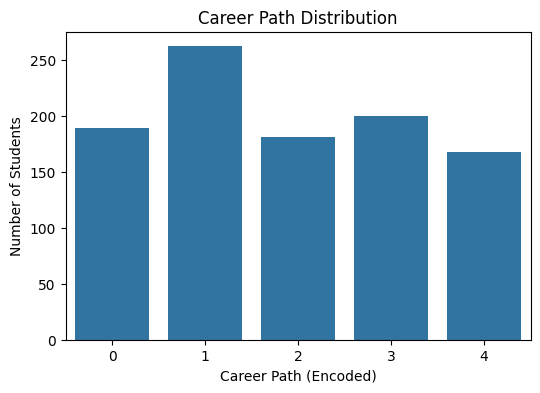

In [9]:
##EDA Analysis (Exploratory Data Analysis)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a barplot to show how many students are in each career path
plt.figure(figsize=(6,4))
sns.countplot(x='Career_Path', data=df)
plt.title('Career Path Distribution')
plt.xlabel('Career Path (Encoded)')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()


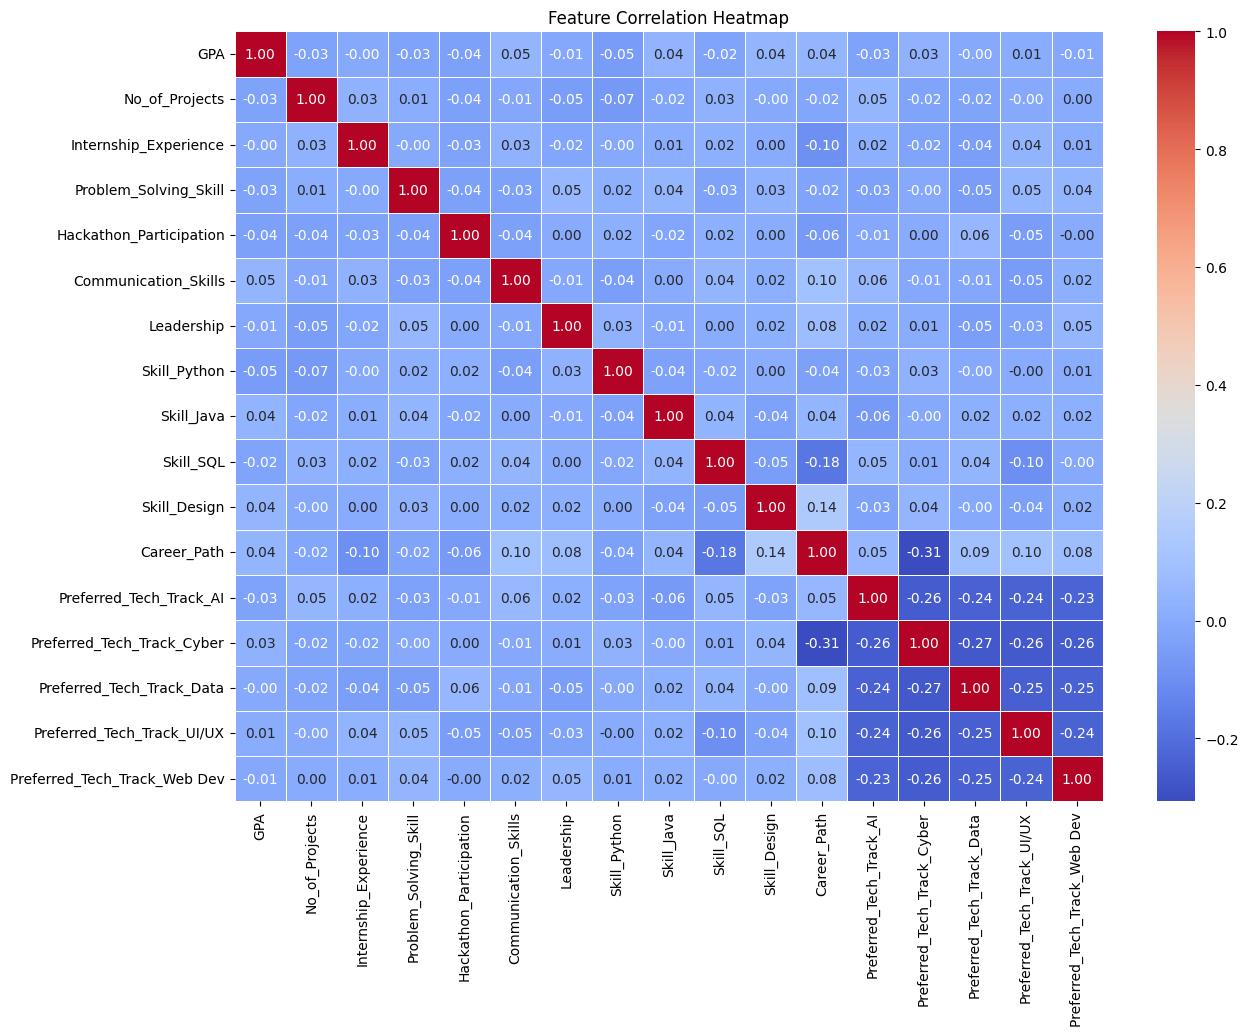

In [10]:
# Plot a heatmap of correlations between numerical features
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


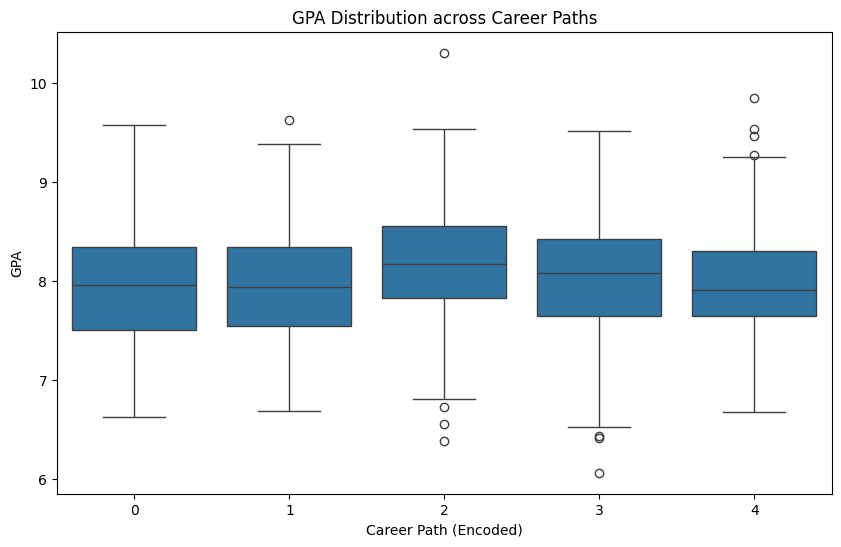

In [11]:
#Boxplot for GPA vs Career_Path
plt.figure(figsize=(10,6))
sns.boxplot(x='Career_Path', y='GPA', data=df)
plt.title('GPA Distribution across Career Paths')
plt.xlabel('Career Path (Encoded)')
plt.ylabel('GPA')
plt.show()


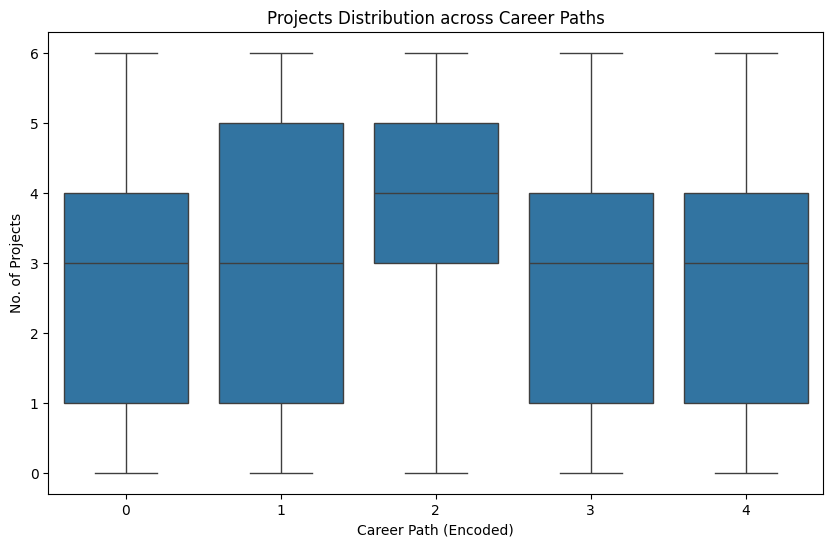

In [12]:

# Boxplot to see how the number of projects varies by career path
plt.figure(figsize=(10,6))
sns.boxplot(x='Career_Path', y='No_of_Projects', data=df)
plt.title('Projects Distribution across Career Paths')
plt.xlabel('Career Path (Encoded)')
plt.ylabel('No. of Projects')
plt.show()


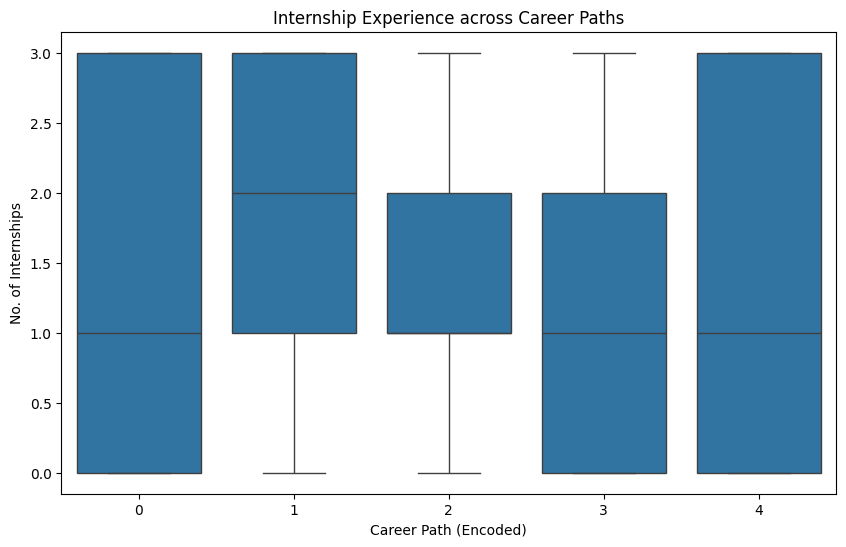

In [13]:
#nternship Experience vs Career Path
plt.figure(figsize=(10,6))
sns.boxplot(x='Career_Path', y='Internship_Experience', data=df)
plt.title('Internship Experience across Career Paths')
plt.xlabel('Career Path (Encoded)')
plt.ylabel('No. of Internships')
plt.show()


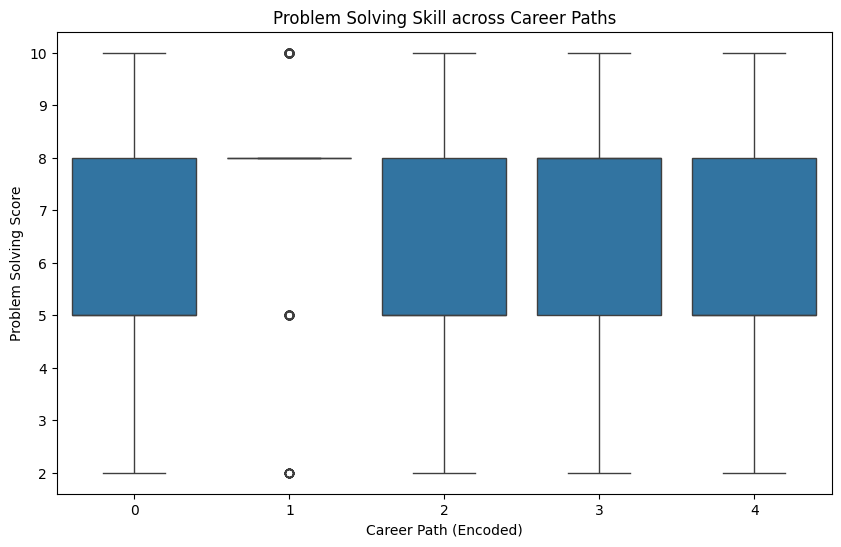

In [14]:
# Solving Skill vs Career Path
plt.figure(figsize=(10,6))
sns.boxplot(x='Career_Path', y='Problem_Solving_Skill', data=df)
plt.title('Problem Solving Skill across Career Paths')
plt.xlabel('Career Path (Encoded)')
plt.ylabel('Problem Solving Score')
plt.show()


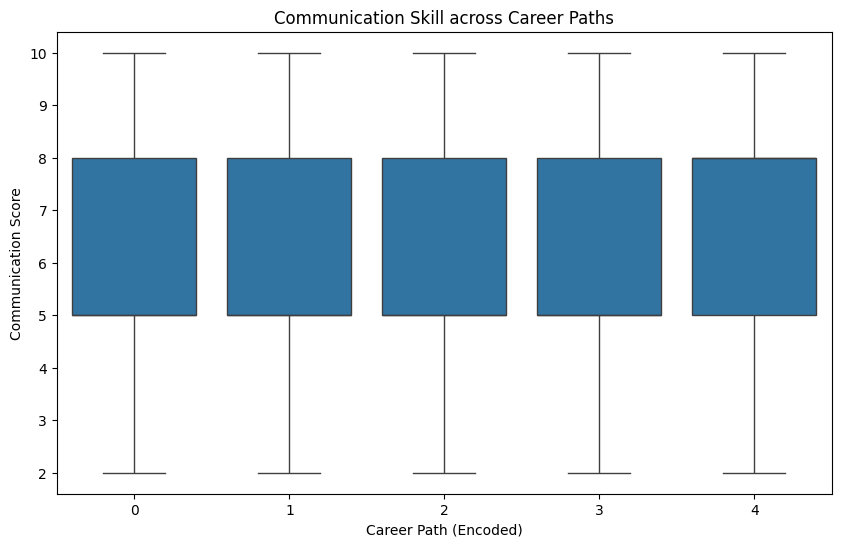

In [15]:
#Communication_Skills vs Career_Path
plt.figure(figsize=(10,6))
sns.boxplot(x='Career_Path', y='Communication_Skills', data=df)
plt.title('Communication Skill across Career Paths')
plt.xlabel('Career Path (Encoded)')
plt.ylabel('Communication Score')
plt.show()


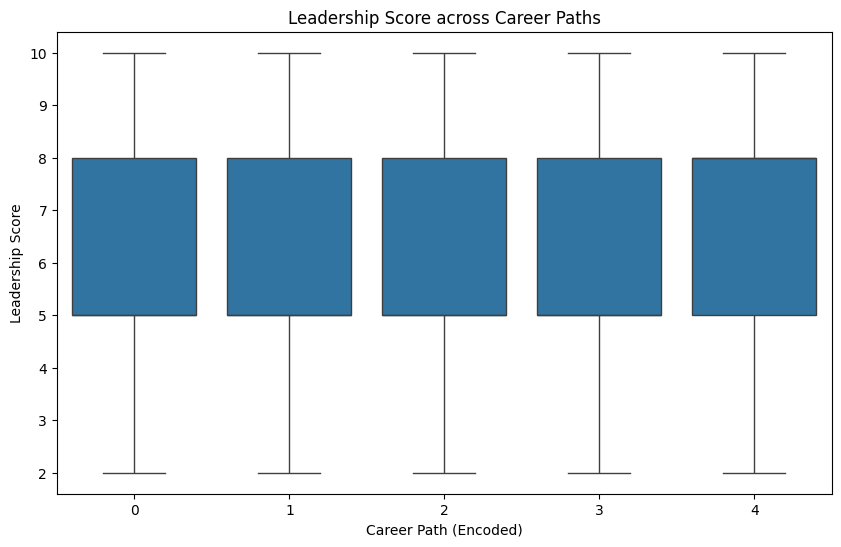

In [16]:
# Leadership vs Career Path
plt.figure(figsize=(10,6))
sns.boxplot(x='Career_Path', y='Leadership', data=df)
plt.title('Leadership Score across Career Paths')
plt.xlabel('Career Path (Encoded)')
plt.ylabel('Leadership Score')
plt.show()


In [17]:
# Separate the input features (X) and the target variable (y)
X = df.drop('Career_Path', axis=1)  # All columns except the label
y = df['Career_Path']               # The target column we want to predict


In [18]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object to normalize the data
scaler = StandardScaler()

# Fit the scaler on the input features and transform them
X_scaled = scaler.fit_transform(X)


In [19]:
import joblib

# Save the fitted scaler to a .pkl file
joblib.dump(scaler, 'scaler.pkl')

print("StandardScaler has been saved as 'scaler.pkl'")

StandardScaler has been saved as 'scaler.pkl'


In [20]:
from sklearn.model_selection import train_test_split

# For models like Random Forest and XGBoost (they work well with raw values)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For models like Logistic Regression, SVM, and KNN (they need scaled features)
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Random Forest Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.58      0.67        45
           1       0.85      0.76      0.80        51
           2       0.56      0.80      0.66        30
           3       0.66      0.66      0.66        44
           4       0.59      0.67      0.62        30

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.71      0.69      0.69       200



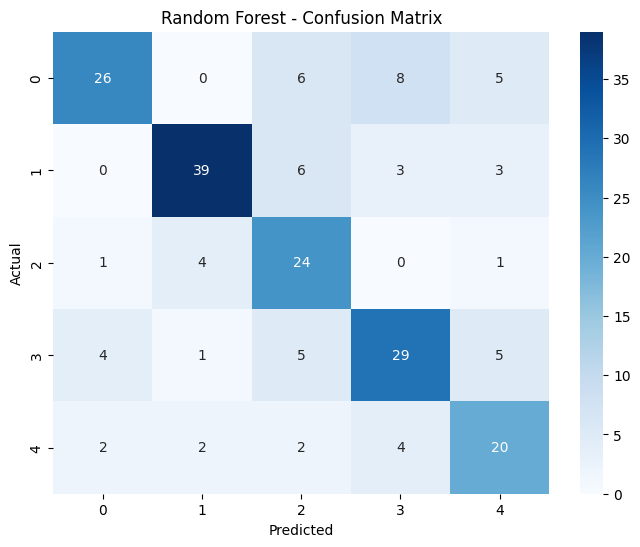

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create and train the Random Forest model using raw features
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_raw, y_train)

# 2. Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_raw)

# 3. Check accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# 4. Print a detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 5. Plot confusion matrix as heatmap for visual clarity
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Logistic Regression Accuracy: 0.595
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.56      0.61        45
           1       0.68      0.78      0.73        51
           2       0.45      0.63      0.53        30
           3       0.64      0.48      0.55        44
           4       0.48      0.47      0.47        30

    accuracy                           0.59       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.61      0.59      0.59       200



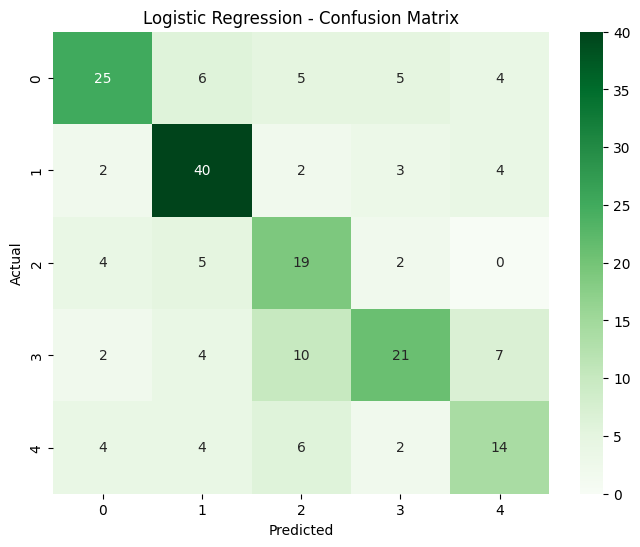

In [22]:
from sklearn.linear_model import LogisticRegression

# 1. Create and train Logistic Regression model on scaled data
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 2. Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# 3. Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# 4. Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# 5. Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        45
           1       0.71      0.80      0.75        51
           2       0.53      0.57      0.55        30
           3       0.61      0.57      0.59        44
           4       0.37      0.37      0.37        30

    accuracy                           0.59       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.59      0.59      0.59       200



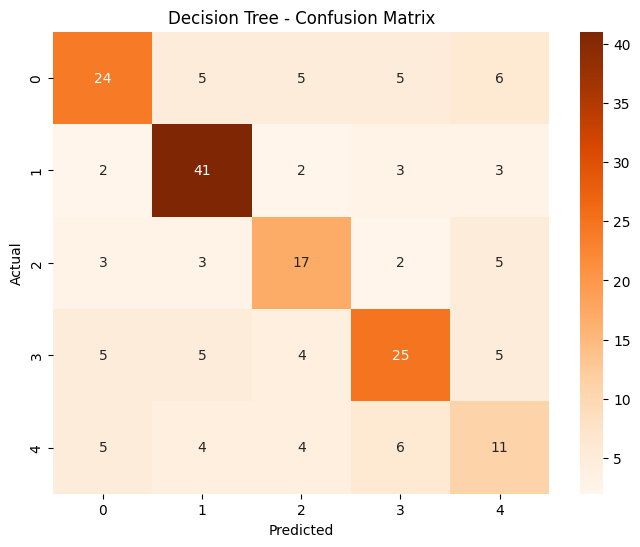

In [23]:
from sklearn.tree import DecisionTreeClassifier

# 1. Create and train Decision Tree model on raw data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_raw, y_train)

# 2. Make predictions
y_pred_dt = dt_model.predict(X_test_raw)

# 3. Check accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# 4. Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# 5. Confusion Matrix plot
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


KNN Accuracy: 0.475
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53        45
           1       0.48      0.61      0.53        51
           2       0.39      0.43      0.41        30
           3       0.53      0.45      0.49        44
           4       0.43      0.20      0.27        30

    accuracy                           0.47       200
   macro avg       0.47      0.45      0.45       200
weighted avg       0.47      0.47      0.46       200



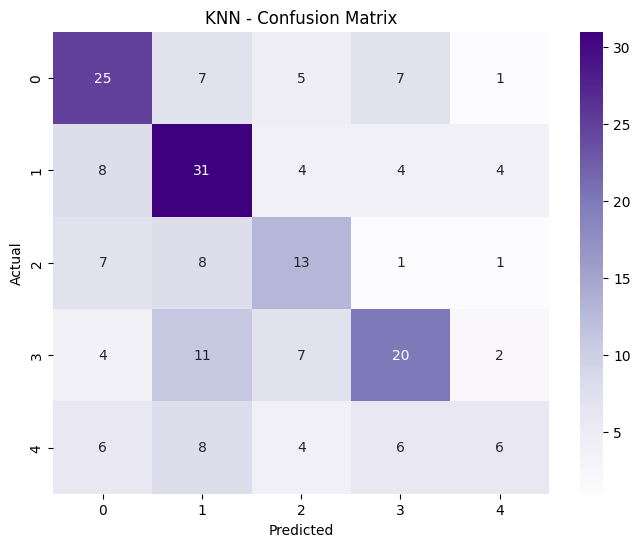

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Create and train the KNN model on scaled data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# 2. Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# 3. Check accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# 4. Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# 5. Confusion Matrix plot
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Purples")
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.47      0.55        45
           1       0.66      0.75      0.70        51
           2       0.50      0.63      0.56        30
           3       0.55      0.50      0.52        44
           4       0.55      0.60      0.57        30

    accuracy                           0.59       200
   macro avg       0.59      0.59      0.58       200
weighted avg       0.60      0.59      0.59       200



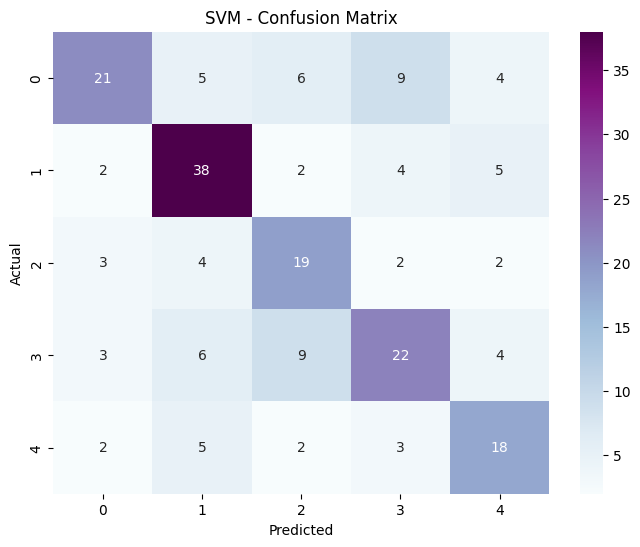

In [25]:
from sklearn.svm import SVC

# 1. Create and train the SVM model on scaled features
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 2. Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# 3. Accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# 4. Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# 5. Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="BuPu")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Users\test\OneDrive\Desktop\ML_project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.675
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.60      0.65        45
           1       0.74      0.73      0.73        51
           2       0.65      0.67      0.66        30
           3       0.60      0.68      0.64        44
           4       0.68      0.70      0.69        30

    accuracy                           0.68       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.68      0.68      0.68       200



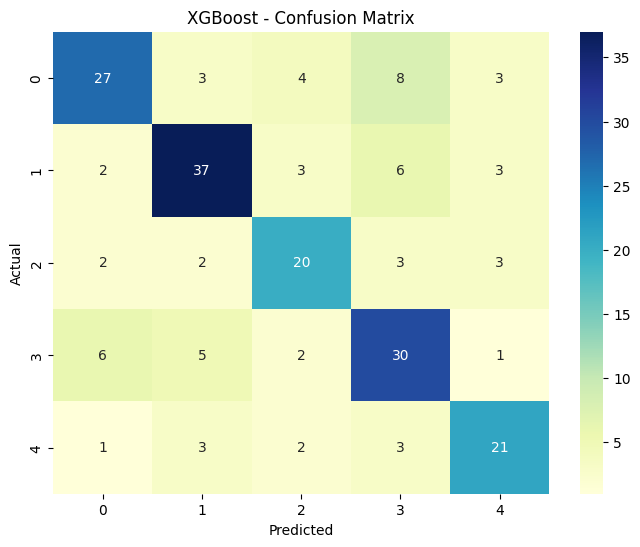

In [26]:
from xgboost import XGBClassifier

# 1. Create and train the XGBoost model on raw data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_raw, y_train)

# 2. Make predictions
y_pred_xgb = xgb_model.predict(X_test_raw)

# 3. Accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# 4. Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# 5. Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="YlGnBu")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Users\test\OneDrive\Desktop\ML_project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Classifier Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64        45
           1       0.82      0.73      0.77        51
           2       0.61      0.77      0.68        30
           3       0.62      0.70      0.66        44
           4       0.68      0.70      0.69        30

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200



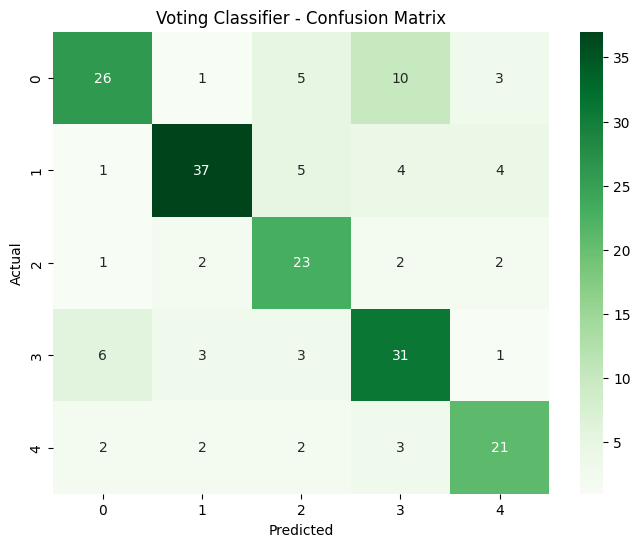

In [27]:
#Voting Classifier Hard & Soft Voting
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 1. Define individual models (already tuned or best performing)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
svm = SVC(probability=True, random_state=42)

# 2. Create a Voting Classifier (soft voting recommended for probability-based classes)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), 
    ('xgb', xgb), 
    ('svm', svm)
], voting='soft')  # 'hard' for majority vote

# 3. Train the model on scaled data (since SVM is in the ensemble)
voting_clf.fit(X_train_scaled, y_train)

# 4. Predict on the test set
y_pred_voting = voting_clf.predict(X_test_scaled)

# 5. Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_voting))

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt="d", cmap="Greens")
plt.title("Voting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Users\test\OneDrive\Desktop\ML_project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\test\OneDrive\Desktop\ML_project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\test\OneDrive\Desktop\ML_project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\test\OneDrive\Desktop\ML_project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:05:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\

Stacking Classifier Accuracy: 0.695
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65        45
           1       0.84      0.73      0.78        51
           2       0.65      0.73      0.69        30
           3       0.64      0.68      0.66        44
           4       0.65      0.73      0.69        30

    accuracy                           0.69       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.70      0.69      0.70       200



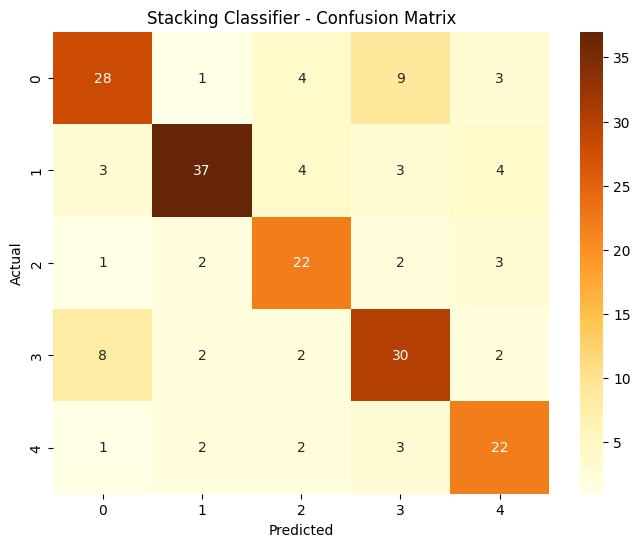

In [28]:
#stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# 1. Define base models (same as before)
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# 2. Define meta-model (Logistic Regression is commonly used)
meta_model = LogisticRegression(max_iter=1000)

# 3. Create Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# 4. Train on scaled data (because SVM is in ensemble)
stacking_clf.fit(X_train_scaled, y_train)

# 5. Predict on test data
y_pred_stack = stacking_clf.predict(X_test_scaled)

# 6. Evaluate performance
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Classification Report:\n", classification_report(y_test, y_pred_stack))

# 7. Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_stack), annot=True, fmt="d", cmap="YlOrBr")
plt.title("Stacking Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
import joblib

# Save the trained stacking model
joblib.dump(stacking_clf, 'stacking_model.pkl')

print("Stacking Classifier model saved successfully as 'stacking_model.pkl'")

Stacking Classifier model saved successfully as 'stacking_model.pkl'


In [30]:
df

,GPA,No_of_Projects,Internship_Experience,Problem_Solving_Skill,Hackathon_Participation,Communication_Skills,Leadership,Skill_Python,Skill_Java,Skill_SQL,Skill_Design,Career_Path,Preferred_Tech_Track_AI,Preferred_Tech_Track_Cyber,Preferred_Tech_Track_Data,Preferred_Tech_Track_UI/UX,Preferred_Tech_Track_Web Dev
0,8.30,6,3,5,0,10,8,0,1,0,0,2,False,False,False,True,False
1,7.92,3,1,2,2,10,8,0,0,1,0,2,True,False,False,False,False
2,8.39,0,1,5,2,5,8,1,0,1,1,2,False,False,False,True,False
3,8.91,2,2,10,1,8,10,0,0,0,0,4,False,False,False,True,False
4,7.86,4,0,8,2,8,8,0,1,1,1,4,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.83,5,0,5,3,8,10,1,1,1,1,4,True,False,False,False,False
996,9.08,6,0,5,3,8,8,0,1,1,0,1,True,False,False,False,False
997,8.38,6,1,10,0,8,5,1,1,0,1,2,False,False,False,False,True
998,7.66,3,3,5,0,8,8,1,0,1,1,4,False,True,False,False,False
